In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [79]:
insurance_data = pd.read_csv('insurance.csv')

In [80]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/var/folders/56/0m1rn0pj71sfyq09pnrtnr880000gn/T/ipykernel_9113/3754394642.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data["age"])


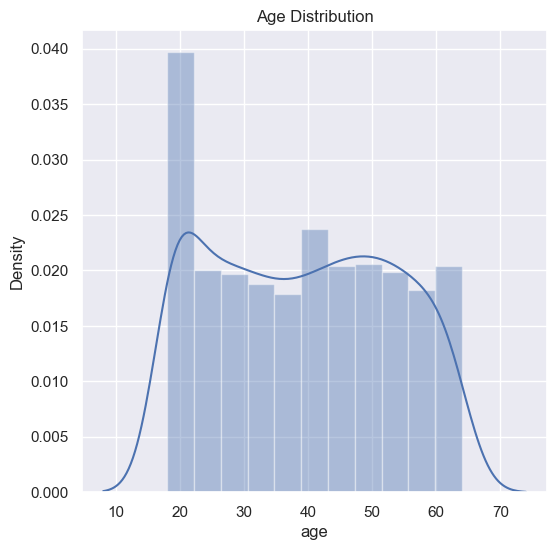

In [81]:
# AGE DISTRIBUTION 

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data["age"])
plt.title("Age Distribution")
plt.show()

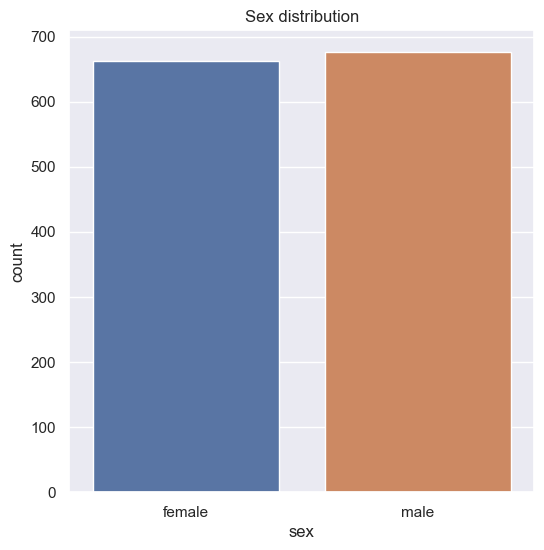

In [82]:
# Gender Distribution, since its categorical (non-int)

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title("Sex distribution")
plt.show()

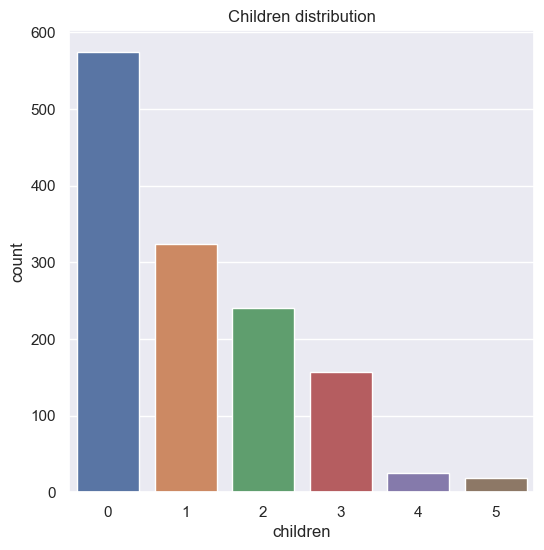

In [83]:
# Children Distribution, since its categorical more than 1 values

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title("Children distribution")
plt.show()

In [84]:
insurance_data["region"].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [85]:
insurance_data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [86]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
# Steps in pre-processing this data, (LABEL ENCODING)

# Sex column, male -> 1, female -> 0
# Smoker column, yes -> 1, no -> 0
# Region column, southeast -> 0, southwest -> 1, northwest -> 2, northeast -> 3

### LABEL ENCODING 

In [87]:
insurance_data.replace(
    {
    "sex":{
        "male":1,
        "female": 0, 
    },
    "smoker":{
        "yes": 1,
        "no": 0
    }, 
    "region":{
        "southeast":0,
        "southwest":1,
        "northwest":2,
        "northeast":3,
    }
    }, inplace=True)

In [88]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [89]:
# We can confirm that no column has a non-float/no-int data type

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [90]:
X = insurance_data.drop(columns="charges", axis=1)

In [91]:
y = insurance_data["charges"]

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [93]:
regressor = LinearRegression()

In [94]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [95]:
# Evaluate model 
# R squared value ( ranges from 0-1 )

# i.e Model predicts the y label/target, and then compare with the original
# label/target 

In [96]:
training_data_prediction = regressor.predict(X_train)

In [97]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

print(r2_train)

0.7518195459072954


In [98]:
test_data_prediction = regressor.predict(X_test)

In [99]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

print(r2_test)

0.7454471618659976


### Building a predictive system 

In [100]:
input_data = (18,1,33.770,1,0,0) # Data gotten from row 4

input_data  = np.asarray(input_data)

input_data = input_data.reshape(1,-1)

In [101]:
prediction = regressor.predict(input_data)

/Users/ihon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
print(prediction)

[3604.42332729]
